### Link for the dataset

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

### Here we are going to clean and automatic update the dataset for outr data analysis purposes

### Loading libraries

In [1]:
import pandas as pd
import geopandas as gpd # is to make working with geospatial data in python easier
import descartes # allows the usage of geometric objects as matplotlib paths and patches

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [3]:
#Load our dataset
df_confirmed =pd.read_csv(confirmed_cases_url)
#df_confirmed.head()

In [4]:
#df_confirmed.shape

#df_confirmed.columns #some are times series data

In [5]:
df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
48673,NaN,Sao Tome and Principe,0.186400,6.613100,7/22/20,747
48674,NaN,Yemen,15.552727,48.516388,7/22/20,1640
48675,NaN,Comoros,-11.645500,43.333300,7/22/20,337
48676,NaN,Tajikistan,38.861000,71.276100,7/22/20,7015


In [6]:
confirmed_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [7]:
#confirmed_df

In [8]:
#confirmed_df['Province/State'].unique()

In [9]:
#confirmed_df['Province/State'].isnull().sum()

In [10]:
confirmed_df.rename(columns={"variable":"Date", "value":"confirmed"}, inplace = True)

In [11]:
confirmed_df.head(1)

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0


In [12]:
#confirmed_df.shape

In [13]:
confirmed_df.tail(1)

,Province/State,Country/Region,Lat,Long,Date,confirmed
48677,NaN,Lesotho,-29.61,28.2336,7/22/20,359


### Now same we going to do with recovered and deaths csv files

In [14]:
# Fuction to fetch and Reshape
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date", "value": case_type}, inplace = True)
    return melted_df

In [15]:
# Fetch death or recovered
recovered_df = get_n_melt_data(recovered_cases_url, "Recovered")
death_df = get_n_melt_data(death_cases_url, "Deaths")

In [16]:
#data
#recovered_df

In [17]:
#death_df

In [18]:
print(confirmed_df.shape)
print(recovered_df.shape)
print(death_df.shape)

(48678, 6)
(46299, 6)
(48678, 6)


### Merging or joining

In [19]:
#confirmed_df

In [20]:
#recovered_df

In [21]:
recovered_df['Recovered'].unique()

array([   0,   28,    2, ..., 9872, 7471, 5741], dtype=int64)

In [22]:
final_df = [confirmed_df,death_df,recovered_df]
final_df = [df.set_index(['Province/State','Country/Region','Lat','Long','Date']) for df in final_df]
final_df = final_df[0].join(final_df[1:])

In [23]:
final_df

confirmed  \
Province/State Country/Region        Lat        Long      Date                 
NaN            Afghanistan            33.939110 67.709953 1/22/20        0.0   
               Albania                41.153300 20.168300 1/22/20        0.0   
               Algeria                28.033900 1.659600  1/22/20        0.0   
               Andorra                42.506300 1.521800  1/22/20        0.0   
               Angola                -11.202700 17.873900 1/22/20        0.0   
...                                                                      ...   
               Sao Tome and Principe  0.186400  6.613100  7/22/20      747.0   
               Yemen                  15.552727 48.516388 7/22/20     1640.0   
               Comoros               -11.645500 43.333300 7/22/20      337.0   
               Tajikistan             38.861000 71.276100 7/22/20     7015.0   
               Lesotho               -29.610000 28.233600 7/22/20      359.0   

                                                                   Deaths  \
Province/State Country/Region        Lat        Long      Date              
NaN            Afghanistan            33.939110 67.709953 1/22/20     0.0   
               Albania                41.153300 20.168300 1/22/20     0.0   
               Algeria                28.033900 1.659600  1/22/20     0.0   
               Andorra                42.506300 1.521800  1/22/20     0.0   
               Angola                -11.202700 17.873900 1/22/20     0.0   
...                                                                   ...   
               Sao Tome and Principe  0.186400  6.613100  7/22/20    14.0   
               Yemen                  15.552727 48.516388 7/22/20   458.0   
               Comoros               -11.645500 43.333300 7/22/20     7.0   
               Tajikistan             38.861000 71.276100 7/22/20    58.0   
               Lesotho               -29.610000 28.233600 7/22/20     6.0   

                                                                   Recovered  
Province/State Country/Region        Lat        Long      Date                
NaN            Afghanistan            33.939110 67.709953 1/22/20        0.0  
               Albania                41.153300 20.168300 1/22/20        0.0  
               Algeria                28.033900 1.659600  1/22/20        0.0  
               Andorra                42.506300 1.521800  1/22/20        0.0  
               Angola                -11.202700 17.873900 1/22/20        0.0  
...                                                                      ...  
               Sao Tome and Principe  0.186400  6.613100  7/22/20      601.0  
               Yemen                  15.552727 48.516388 7/22/20      751.0  
               Comoros               -11.645500 43.333300 7/22/20      319.0  
               Tajikistan             38.861000 71.276100 7/22/20     5741.0  
               Lesotho               -29.610000 28.233600 7/22/20       69.0  

[48678 rows x 3 columns]

In [24]:
final_df  = final_df.reset_index()

In [25]:
final_df[['Lat','Long','confirmed','Deaths','Recovered']] = final_df[['Lat','Long','confirmed','Deaths','Recovered']].apply(pd.to_numeric)

In [26]:
final_df.head(1)

,Province/State,Country/Region,Lat,Long,Date,confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0.0,0.0,0.0


In [27]:
final_df[['Date']] = final_df[['Date']].apply(pd.to_datetime)

In [28]:
final_df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [29]:
final_df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
confirmed         False
Deaths            False
Recovered          True
dtype: bool

In [30]:
final_df['Recovered'].unique()

array([   0.,   nan,   28., ..., 9872., 7471., 5741.])

In [31]:
final_df[["confirmed","Deaths","Recovered"]] = final_df[["confirmed","Deaths","Recovered"]].fillna("0").astype(int)

In [32]:
final_df.head(1)

,Province/State,Country/Region,Lat,Long,Date,confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0


In [36]:
#final_df[final_df['Country/Region'] == 'India']
#final_df[final_df['Country/Region'] == 'US']

In [37]:
#Export data
final_df.to_csv('covid19_updated_dataset.csv')

### Geospatial plot

In [38]:
final_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [39]:
#Convert data to geodataframe
gdf01 = gpd.GeoDataFrame(final_df,geometry=gpd.points_from_xy(final_df['Long'],final_df['Lat']))

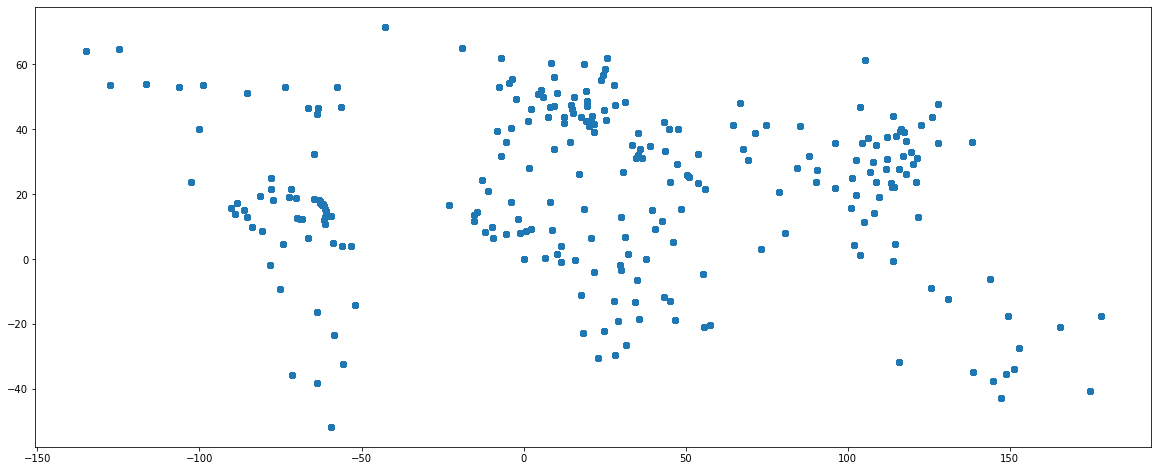

In [42]:
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

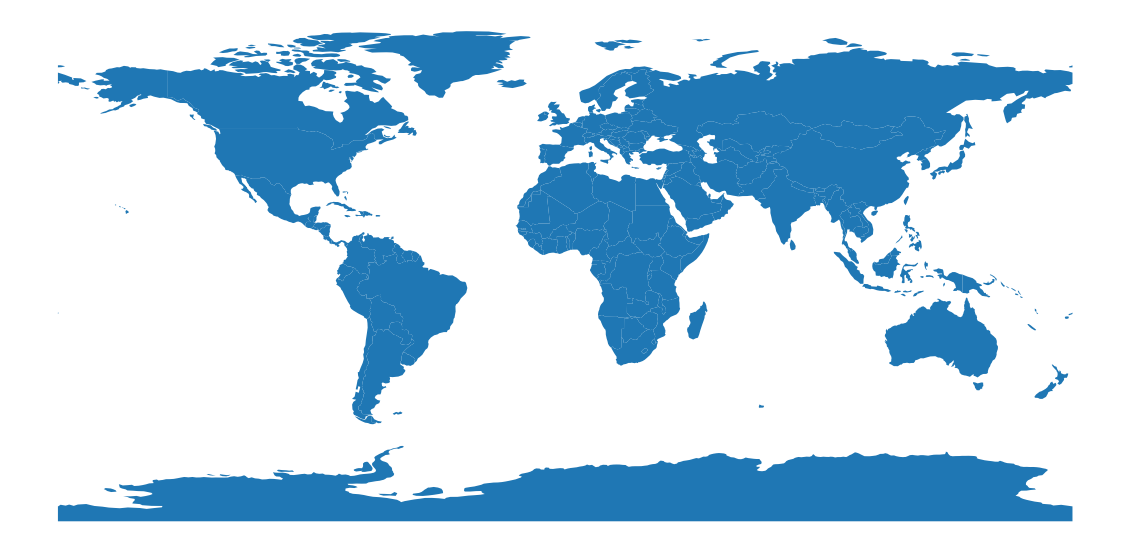

In [44]:
#World Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

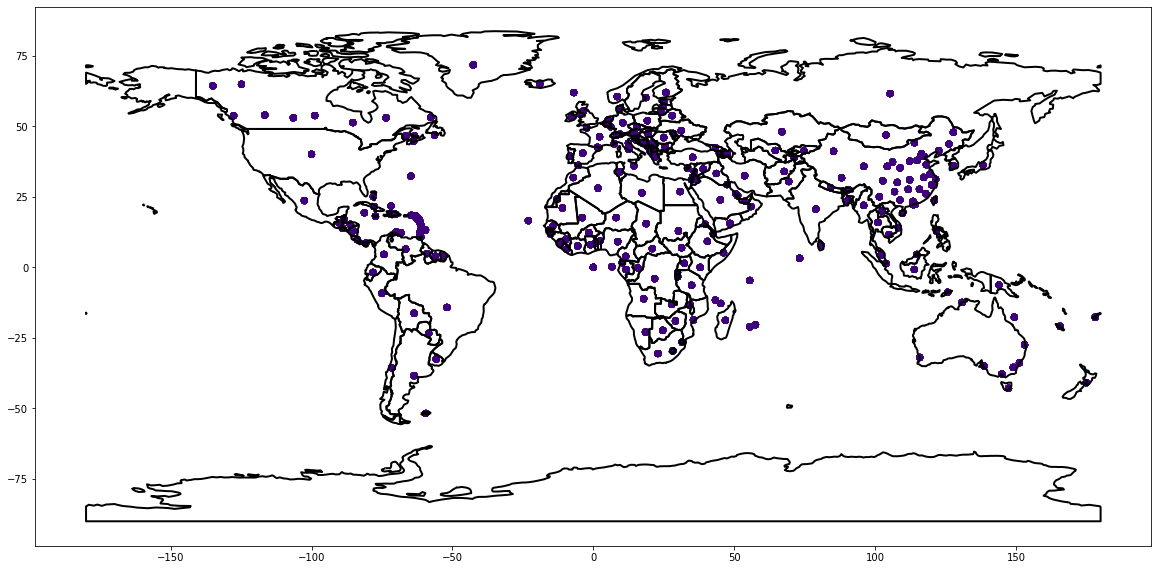

In [45]:
# Overlap with data
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax )